In [1]:
# IN this Scenario we are adding 7 more new features to improve the complexity of our code

# 1) Question1 length
# 2) Question2 Length
# 3) Question1 words
# 4) Question2 words
# 5) words common
# 6) words share
# 7) words total

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [3]:
# Load the Dataset
df=pd.read_csv("train.csv")

In [4]:
# Check the shape of the dataset
df.shape

(404290, 6)

In [5]:
# Take only some samples because dataset size is too large
df=df.sample(30000)

In [6]:
# Check the first 5 rows of the dataset
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
272961,272961,391327,391328,"What does ""PAN"" stand for in India?",Does US stand a chance in a war against India?,0
63657,63657,110738,29063,How do you become a better writer?,How can I improve my writing skills?,0
259473,259473,375230,375231,What is Gujarat famous for?,How is Gujarat Developed?,0
230793,230793,205342,340432,What is it like to be in a polyamorous relatio...,I want to be in a Polyamorous relationship bec...,0
372993,372993,503752,133803,"Is beauty is in the eye of the beholder, or is...",Is beauty in the eye of the beholder?,1


In [7]:
# Check is there any null values or not
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [8]:
# if there is any null values then remove it
df.dropna(axis=0,inplace=True)

is_duplicate
0    18995
1    11005
Name: count, dtype: int64
is_duplicate
0    63.316667
1    36.683333
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

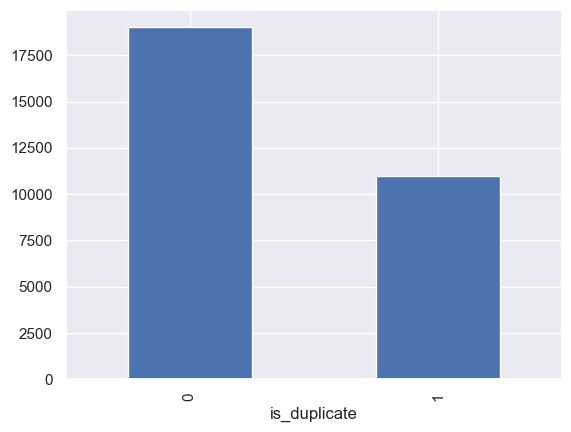

In [9]:
# Distribution of duplicates and non-duplicates question

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [10]:
# Repeated question 

qid=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
print("Number of unique questions:",np.unique(qid).shape[0])
x=qid.value_counts()>1
print("Number of Duplicate question:",x[x].shape[0])

Number of unique questions: 55373
Number of Duplicate question: 3430


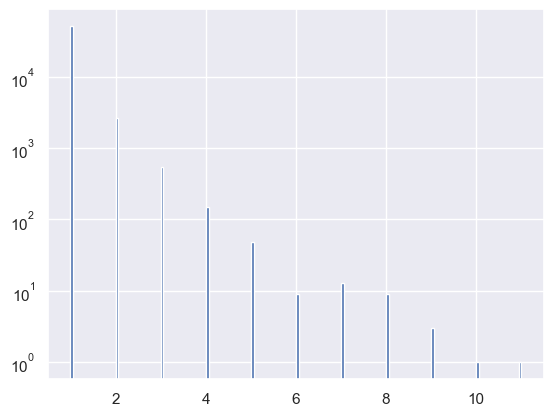

In [11]:
# Repeated question histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [23]:
# Feature Engeneering

df['q1_len']=df['question1'].str.len()
df['q2_len']=df['question2'].str.len()

In [24]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,words_common,total_words,word_share
272961,272961,391327,391328,"What does ""PAN"" stand for in India?",Does US stand a chance in a war against India?,0,35,46,7,10,4,16,0.25
63657,63657,110738,29063,How do you become a better writer?,How can I improve my writing skills?,0,34,36,7,7,1,14,0.07
259473,259473,375230,375231,What is Gujarat famous for?,How is Gujarat Developed?,0,27,25,5,4,2,9,0.22
230793,230793,205342,340432,What is it like to be in a polyamorous relatio...,I want to be in a Polyamorous relationship bec...,0,52,146,10,29,6,35,0.17
372993,372993,503752,133803,"Is beauty is in the eye of the beholder, or is...",Is beauty in the eye of the beholder?,1,60,37,13,8,6,17,0.35


In [25]:
# Total number of words in question 1 and total number of words in question 2

df['q1_num_words']=df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_num_words']=df['question2'].apply(lambda row: len(row.split(" ")))
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,words_common,total_words,word_share
272961,272961,391327,391328,"What does ""PAN"" stand for in India?",Does US stand a chance in a war against India?,0,35,46,7,10,4,16,0.25
63657,63657,110738,29063,How do you become a better writer?,How can I improve my writing skills?,0,34,36,7,7,1,14,0.07
259473,259473,375230,375231,What is Gujarat famous for?,How is Gujarat Developed?,0,27,25,5,4,2,9,0.22
230793,230793,205342,340432,What is it like to be in a polyamorous relatio...,I want to be in a Polyamorous relationship bec...,0,52,146,10,29,6,35,0.17
372993,372993,503752,133803,"Is beauty is in the eye of the beholder, or is...",Is beauty in the eye of the beholder?,1,60,37,13,8,6,17,0.35


In [26]:
# Total number of words common

def common_words(row):
    w1=set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
    return len(w1&w2)

In [27]:
df['words_common']=df.apply(common_words,axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,words_common,total_words,word_share
272961,272961,391327,391328,"What does ""PAN"" stand for in India?",Does US stand a chance in a war against India?,0,35,46,7,10,4,16,0.25
63657,63657,110738,29063,How do you become a better writer?,How can I improve my writing skills?,0,34,36,7,7,1,14,0.07
259473,259473,375230,375231,What is Gujarat famous for?,How is Gujarat Developed?,0,27,25,5,4,2,9,0.22
230793,230793,205342,340432,What is it like to be in a polyamorous relatio...,I want to be in a Polyamorous relationship bec...,0,52,146,10,29,6,35,0.17
372993,372993,503752,133803,"Is beauty is in the eye of the beholder, or is...",Is beauty in the eye of the beholder?,1,60,37,13,8,6,17,0.35


In [28]:
# Total number of words common

def total_words(row):
    w1=set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
    return (len(w1)+len(w2))

In [29]:
df['total_words']=df.apply(total_words,axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,words_common,total_words,word_share
272961,272961,391327,391328,"What does ""PAN"" stand for in India?",Does US stand a chance in a war against India?,0,35,46,7,10,4,16,0.25
63657,63657,110738,29063,How do you become a better writer?,How can I improve my writing skills?,0,34,36,7,7,1,14,0.07
259473,259473,375230,375231,What is Gujarat famous for?,How is Gujarat Developed?,0,27,25,5,4,2,9,0.22
230793,230793,205342,340432,What is it like to be in a polyamorous relatio...,I want to be in a Polyamorous relationship bec...,0,52,146,10,29,6,35,0.17
372993,372993,503752,133803,"Is beauty is in the eye of the beholder, or is...",Is beauty in the eye of the beholder?,1,60,37,13,8,6,17,0.35


In [30]:
# Words share

df['word_share']=round(df['words_common']/df['total_words'],2)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,words_common,total_words,word_share
272961,272961,391327,391328,"What does ""PAN"" stand for in India?",Does US stand a chance in a war against India?,0,35,46,7,10,4,16,0.25
63657,63657,110738,29063,How do you become a better writer?,How can I improve my writing skills?,0,34,36,7,7,1,14,0.07
259473,259473,375230,375231,What is Gujarat famous for?,How is Gujarat Developed?,0,27,25,5,4,2,9,0.22
230793,230793,205342,340432,What is it like to be in a polyamorous relatio...,I want to be in a Polyamorous relationship bec...,0,52,146,10,29,6,35,0.17
372993,372993,503752,133803,"Is beauty is in the eye of the beholder, or is...",Is beauty in the eye of the beholder?,1,60,37,13,8,6,17,0.35


In [31]:
# Perform some EDA on additional columns

minimum characters: 1
maximum characters: 320
average characters: 59


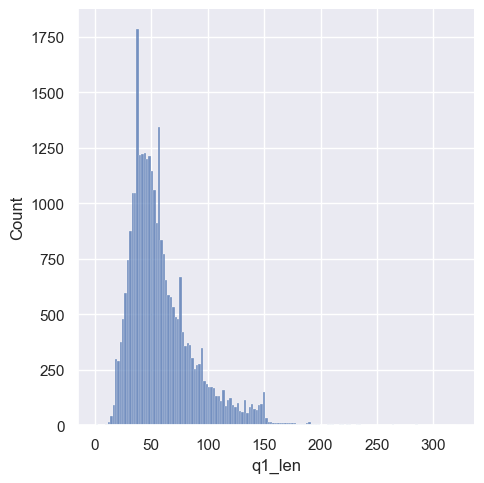

In [32]:
sns.displot(df['q1_len'])
print("minimum characters:",df['q1_len'].min())
print("maximum characters:",df['q1_len'].max())
print("average characters:",int(df['q1_len'].mean()))

minimum characters: 4
maximum characters: 1151
average characters: 59


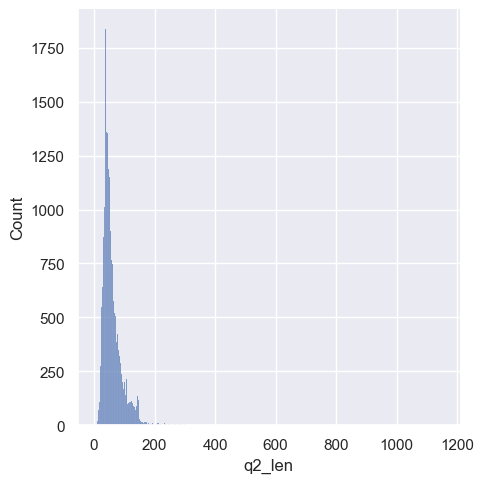

In [33]:
sns.displot(df['q2_len'])
print("minimum characters:",df['q2_len'].min())
print("maximum characters:",df['q2_len'].max())
print("average characters:",int(df['q2_len'].mean()))

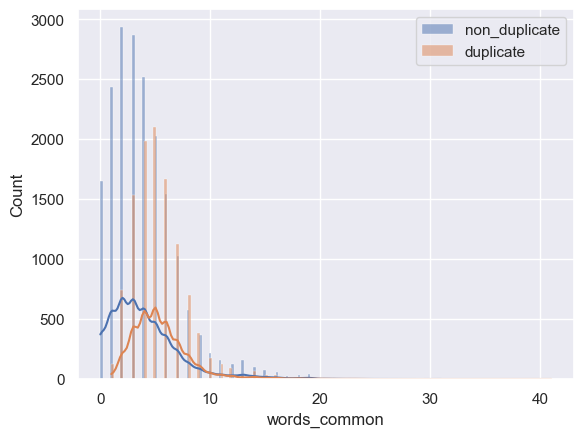

In [38]:
# What is the probability to be duplicate or non duplicate based on words common

sns.histplot(df[df['is_duplicate']==0]['words_common'], label='non_duplicate', kde=True)
sns.histplot(df[df['is_duplicate']==1]['words_common'], label='duplicate', kde=True)
plt.legend()
plt.show()

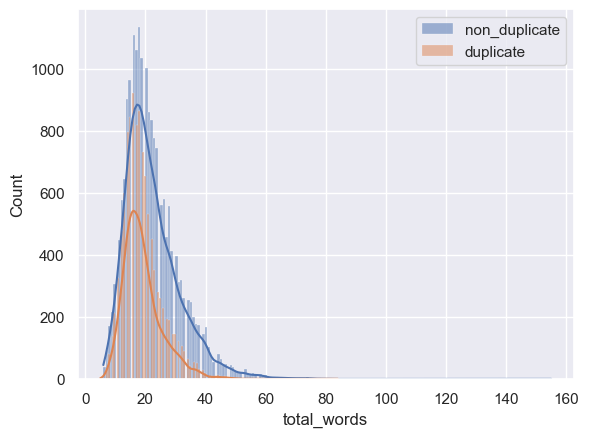

In [37]:
# What is the probability to be duplicate or non duplicate based on total words

sns.histplot(df[df['is_duplicate']==0]['total_words'], label='non_duplicate', kde=True)
sns.histplot(df[df['is_duplicate']==1]['total_words'], label='duplicate', kde=True)
plt.legend()
plt.show()

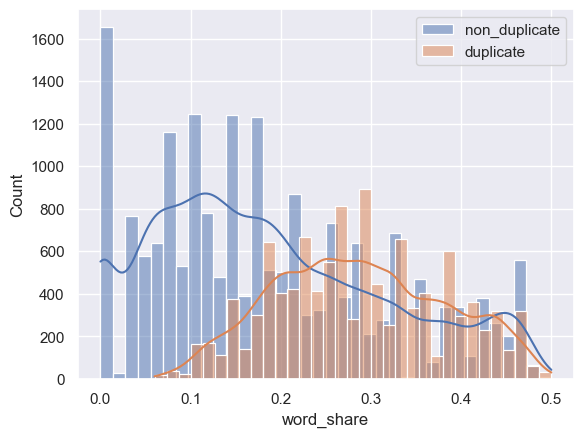

In [40]:
# What is the probability to be duplicate or non duplicate based on words share

sns.histplot(df[df['is_duplicate']==0]['word_share'], label='non_duplicate', kde=True)
sns.histplot(df[df['is_duplicate']==1]['word_share'], label='duplicate', kde=True)
plt.legend()
plt.show()

In [42]:
# Now create a new dataframe and apply BOW

ques_df=df[['question1','question2']]
ques_df.head()

,question1,question2
272961,"What does ""PAN"" stand for in India?",Does US stand a chance in a war against India?
63657,How do you become a better writer?,How can I improve my writing skills?
259473,What is Gujarat famous for?,How is Gujarat Developed?
230793,What is it like to be in a polyamorous relatio...,I want to be in a Polyamorous relationship bec...
372993,"Is beauty is in the eye of the beholder, or is...",Is beauty in the eye of the beholder?


In [43]:
final_df=df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,words_common,total_words,word_share
272961,0,35,46,7,10,4,16,0.25
63657,0,34,36,7,7,1,14,0.07
259473,0,27,25,5,4,2,9,0.22
230793,0,52,146,10,29,6,35,0.17
372993,1,60,37,13,8,6,17,0.35


In [44]:
# now we are extracting top 3000 features using BOW and we are spliting into two equal arrays then take first question
# and add 3000 feature in the q1_array and same with q2 

from sklearn.feature_extraction.text import CountVectorizer
questions=list(ques_df['question1'])+list(ques_df['question2'])

cv=CountVectorizer(max_features=3000)

q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [45]:
# Now we are taking first question array create 3000 columns then take 3000 columns create 3000 in same row
# then concatenate two arrays, make a dataframe now in this dataframe we have all integer values
temp_df_1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df_2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df_1,temp_df_2],axis=1)
temp_df.shape

# 300000 samples and [ 30000(first_ques)+3000(second_ques) features] from total 30000 top words

(30000, 6000)

In [47]:
final_df=pd.concat([final_df,temp_df],axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,words_common,total_words,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
272961,0,35,46,7,10,4,16,0.25,0,0,...,0,0,0,0,0,0,0,0,0,0
63657,0,34,36,7,7,1,14,0.07,0,0,...,0,0,0,0,0,0,0,0,0,0
259473,0,27,25,5,4,2,9,0.22,0,0,...,0,0,0,0,0,0,0,0,0,0
230793,0,52,146,10,29,6,35,0.17,0,0,...,0,0,0,0,0,0,0,0,0,0
372993,1,60,37,13,8,6,17,0.35,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# Now we are importing train test split model to split our dataset into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=42)

In [56]:
# Now we are applying RandomForestClassifier model to predict the final output
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)
# Here is the accuracy

0.7653333333333333

In [57]:
# Now use another model XGB Classifier 
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7696666666666667

In [63]:
q1 = "who is current prime minister of india"
q2 = "who is the first prime minister of india"

def compute_features(q1, q2):
    q1_words = set(q1.lower().split())
    q2_words = set(q2.lower().split())
    
    q1_len = len(q1)
    q2_len = len(q2)
    q1_num_words = len(q1_words)
    q2_num_words = len(q2_words)
    
    words_common = len(q1_words & q2_words)
    total_words = len(q1_words | q2_words)
    word_share = words_common / total_words if total_words > 0 else 0
    
    return [q1_len, q2_len, q1_num_words, q2_num_words, words_common, total_words, word_share]
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=3000)
q1_features = vectorizer.fit_transform(df['question1'])
q2_features = vectorizer.fit_transform(df['question2'])

q1_bow = vectorizer.transform([q1]).toarray()[0]
q2_bow = vectorizer.transform([q2]).toarray()[0]

import numpy as np

manual_features = compute_features(q1, q2)
final_features = np.hstack([manual_features, q1_bow, q2_bow])

prediction = rf.predict([final_features])
print("Duplicate" if prediction[0]==1 else "Not Duplicate")


Duplicate
